<a href="https://colab.research.google.com/github/GJ-007-sage/Astronomy/blob/main/GuruJahnavi_24B1809_K_CAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-CAP Assignment

### Below are the instructions for the assignment. Please read and follow them carefully.


1.   There are 3 parts in this assignment and **none** are optional.
2.   Answer/code for each question is to be written in the code cell following the question.
3.   **Do not** edit this notebook. Make a copy in your drive to solve the assignment.
3.   The csv files mentioned in the assignment, ```cepheids.csv``` and ```curves.csv``` can be downloaded and used from this [Drive link](https://drive.google.com/drive/folders/17DkvsU0GVGOnffZCsgkkp5A3SbQRTWQf?usp=sharing).
2.   Comment your code wherever needed.
3.   The resources that may be required for help and reference are uploaded on this [github repo](https://github.com/krittikaiitb/tutorials).
4.   The **deadline** for the assignment submission is **29th November 11.59 pm** and no further extension will be provided.
5.   Upload the link to your .ipynb notebook on this [google form](https://docs.google.com/forms/d/e/1FAIpQLSewj0UyD1a22d_GKOq-7_i9yWu40Az_x9s-rxJqVF-60_C9CA/viewform?usp=sharing) for submission.
6.   Make sure you have given access to submission file before submitting.

# All The Best!!



# Cepheids

Cepheids are a type of variable star that pulsate radially, varying in both diameter and temperature, which produces changes in brightness with a well-defined stable period and amplitude. These stars are significant in the field of astronomy for several reasons:

1. **Standard Candles**: Cepheids have a well-established relationship between their luminosity and pulsation period, known as the Leavitt law or period-luminosity relation. This makes them excellent standard candles for measuring astronomical distances.

2. **Distance Measurement**: By observing the period of a Cepheid's brightness variations, astronomers can determine its absolute magnitude. Comparing this with the apparent magnitude allows for the calculation of the distance to the star, which is crucial for mapping the scale of the universe.

3. **Galactic and Extragalactic Studies**: Cepheids are used to measure distances within our galaxy and to nearby galaxies. This helps in understanding the structure and scale of the Milky Way and the local group of galaxies.

4. **Historical Importance**: The discovery of Cepheids in the Andromeda galaxy by Edwin Hubble was pivotal in establishing that the universe is expanding, leading to the formulation of the Big Bang theory.

Cepheids continue to be a vital tool in modern astrophysics, aiding in the calibration of other distance measurement methods and contributing to our understanding of the cosmos.

# Part 1

The data in ```cepheids.csv``` is organised in two columns: the period of the cepheid variable and its absolute magnitude calculated from mean luminosity.

These two values are actually related by the Leavitt law:
$$M = a \cdot \log_{10}{P} + b$$

First, find the constants $a$ and $b$ in this relation to fit the given data.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving cepheids.csv to cepheids.csv


In [2]:
import pandas as pd

data = pd.read_csv('cepheids.csv')
print(data.head())  # To verify the data


     Period       M
0  1.971066 -2.0880
1  2.831928 -2.7078
2  2.528784 -2.4233
3  2.820377 -2.8269
4  2.828032 -2.5337


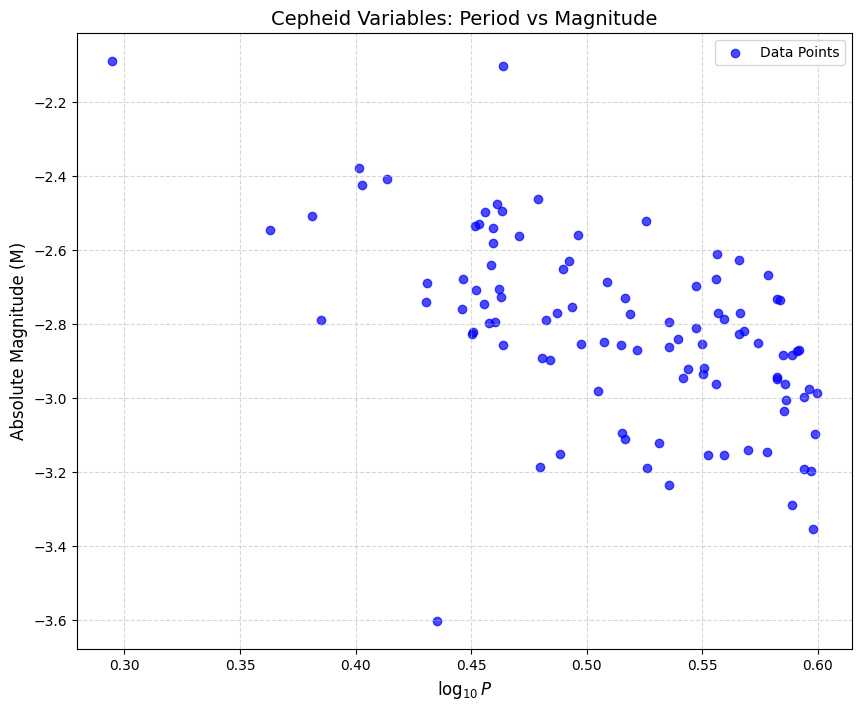

In [3]:

import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('cepheids.csv')
period = data['Period']
magnitude = data['M']

# Compute log10 of the period for the x-axis
log_period = np.log10(period)

# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(log_period, magnitude, color='blue', label='Data Points', alpha=0.7)
plt.xlabel(r'$\log_{10} P$', fontsize=12)
plt.ylabel('Absolute Magnitude (M)', fontsize=12)
plt.title('Cepheid Variables: Period vs Magnitude', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


In [4]:
from sklearn.linear_model import LinearRegression

# Reshape log_period for regression (as sklearn expects a 2D array for predictors)
log_period = log_period.values.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(log_period, magnitude)
a = model.coef_[0]
b = model.intercept_

print(f"a (slope): {a}")
print(f"b (intercept): {b}")


a (slope): -2.2164100598180405
b (intercept): -1.6808674146142555


Next, plot the data along with your fitted line to visually verify that you have found the correct constants.

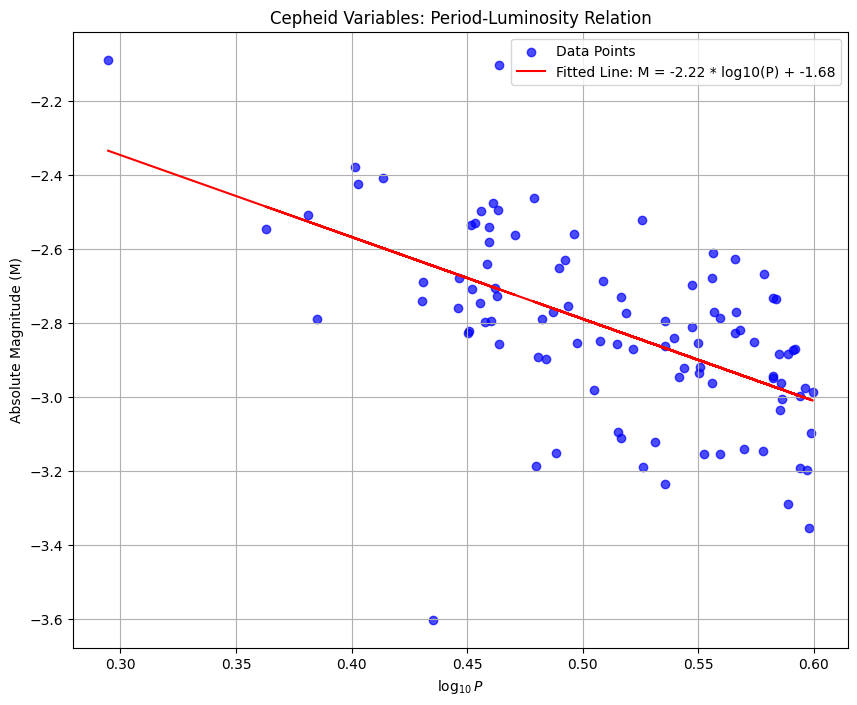

In [5]:
# Generate fitted values
fitted_magnitude = model.predict(log_period)

# Plot the data and the fitted line
plt.figure(figsize=(10, 8))
plt.scatter(log_period, magnitude, color='blue', label='Data Points', alpha=0.7)
plt.plot(log_period, fitted_magnitude, color='red', label=f'Fitted Line: M = {a:.2f} * log10(P) + {b:.2f}')
plt.xlabel(r'$\log_{10} P$')
plt.ylabel('Absolute Magnitude (M)')
plt.title('Cepheid Variables: Period-Luminosity Relation')
plt.legend()
plt.grid(True)
plt.show()

# Part 2

Now we are ready to use the result we have obtained from the above markdown to solve the problem.

Given in the ```curves.csv``` file is the data of the light curves of many cepheids in the line of sight of a galaxy. The data contains three columns: ID(Unique for every cepheid), JD (the julian date of observation) and the apparent magnitude observed.

First we need to find the period of each cepheid.

In [6]:
from google.colab import files
uploaded = files.upload()


Saving curves.csv to curves.csv


In [7]:

data = pd.read_csv('curves.csv')
print(data.head())  # To verify the data


        ID           JD          m
0  2434670  5401.958136  22.255868
1  2434670  5402.089108  21.972137
2  2434670  5402.973535  21.980222
3  2434670  5403.101780  22.179343
4  2434670  5405.084948  22.060510


In [8]:
from scipy.signal import find_peaks

curves = pd.read_csv('curves.csv')

# Find the period for each Cepheid
cepheid_periods = {}

# Loop through each unique Cepheid ID
for cepheid_id in curves['ID'].unique():
    # Filter data for the current Cepheid
    data = curves[curves['ID'] == cepheid_id]

    # Sort by Julian date
    data = data.sort_values(by='JD')

    # Extract JD and Apparent Magnitude
    jd = data['JD'].values
    magnitude = data['m'].values

    # Find peaks in the light curve
    peaks, _ = find_peaks(-magnitude, prominence=0.3)  # Using distance as in first code

    if len(peaks) > 1:
        # Calculate time differences between successive peaks
        time_diffs = np.diff(jd[peaks])
        period = np.mean(time_diffs)  # Average period
    else:
        period = np.nan  # Not enough data to determine a period

    # Store the period
    cepheid_periods[cepheid_id] = period

# Create a DataFrame to display the results
periods_df = pd.DataFrame({
    'ID': list(cepheid_periods.keys()),
    'Period (days)': list(cepheid_periods.values())  # Include unit in the column header
})

# Drop Cepheids with undetermined periods
periods_df = periods_df.dropna()
print(periods_df)

# Save to a CSV if needed
periods_df.to_csv('cepheid_periods.csv', index=False)


          ID  Period (days)
0    2434670      21.545561
1    2442608      17.040541
2    2443943      30.146539
3    2446727      15.192452
4    2447157      25.684693
..       ...            ...
970   832653      92.320095
971  2190690      86.756235
972   566046      98.242244
973   188335     103.820273
974  1614138     112.897421

[973 rows x 2 columns]


an example of the light curve - of cepheid ID- 2434670

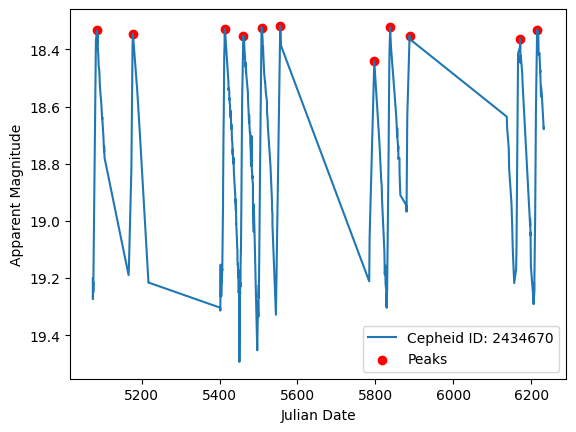

In [9]:
plt.plot(jd, magnitude, label=f'Cepheid ID: 2434670')
plt.scatter(jd[peaks], magnitude[peaks], color='red', label='Peaks')
plt.xlabel('Julian Date')
plt.ylabel('Apparent Magnitude')
plt.gca().invert_yaxis()  # Invert y-axis as magnitude is inversely proportional to brightness
plt.legend()
plt.show()


Next, using the calculated periods, find the absolute magnitude of these stars using the relation you found earlier.

In [10]:
periods_df = pd.read_csv('cepheid_periods.csv')


# Calculate the absolute magnitude for each Cepheid
periods_df['Log10_Period'] = np.log10(periods_df['Period (days)'])
periods_df['Absolute_Magnitude'] = a * periods_df['Log10_Period'] + b

print(periods_df)

# Save to CSV if needed
periods_df.to_csv('cepheid_absolute_magnitudes.csv', index=False)


          ID  Period (days)  Log10_Period  Absolute_Magnitude
0    2434670      21.545561      1.333358           -4.636135
1    2442608      17.040541      1.231483           -4.410340
2    2443943      30.146539      1.479237           -4.959464
3    2446727      15.192452      1.181628           -4.299839
4    2447157      25.684693      1.409674           -4.805284
..       ...            ...           ...                 ...
968   832653      92.320095      1.965296           -6.036770
969  2190690      86.756235      1.938301           -5.976937
970   566046      98.242244      1.992298           -6.096617
971   188335     103.820273      2.016282           -6.149775
972  1614138     112.897421      2.052684           -6.230457

[973 rows x 4 columns]


Then, using the apparent magnitude data, find the distance to these cepheid variables.

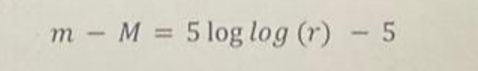





> i am using the above formula where,
m= apparent magnitude (given in data)
M= absolute magnitude (calculated above)
r= distance in parsecs


```



In [11]:

# Load the curves data (for apparent magnitudes) and absolute magnitudes
curves = pd.read_csv('curves.csv')
absolute_magnitudes = pd.read_csv('cepheid_absolute_magnitudes.csv') # M

# Calculate the mean apparent magnitude for each Cepheid
mean_magnitudes = curves.groupby('ID')['m'].mean().reset_index()
mean_magnitudes.rename(columns={'m': 'Mean_Apparent_Magnitude'}, inplace=True) # m

merged_data = pd.merge(absolute_magnitudes, mean_magnitudes, on='ID')

# Calculate the distance in parsecs using the distance modulus formula
merged_data['Distance_Parsecs'] = 10 ** ((merged_data['Mean_Apparent_Magnitude'] - merged_data['Absolute_Magnitude'] + 5) / 5)

print(merged_data[['ID', 'Period (days)', 'Absolute_Magnitude', 'Mean_Apparent_Magnitude', 'Distance_Parsecs']])

# Save to CSV if needed
merged_data.to_csv('cepheid_distances.csv', index=False)


          ID  Period (days)  Absolute_Magnitude  Mean_Apparent_Magnitude  \
0    2434670      21.545561           -4.636135                22.073319   
1    2442608      17.040541           -4.410340                22.119716   
2    2443943      30.146539           -4.959464                21.317328   
3    2446727      15.192452           -4.299839                13.865486   
4    2447157      25.684693           -4.805284                21.555355   
..       ...            ...                 ...                      ...   
968   832653      92.320095           -6.036770                20.137106   
969  2190690      86.756235           -5.976937                18.966206   
970   566046      98.242244           -6.096617                19.377212   
971   188335     103.820273           -6.149775                19.140732   
972  1614138     112.897421           -6.230457                18.780224   

     Distance_Parsecs  
0        2.197308e+06  
1        2.023071e+06  
2        1.8003

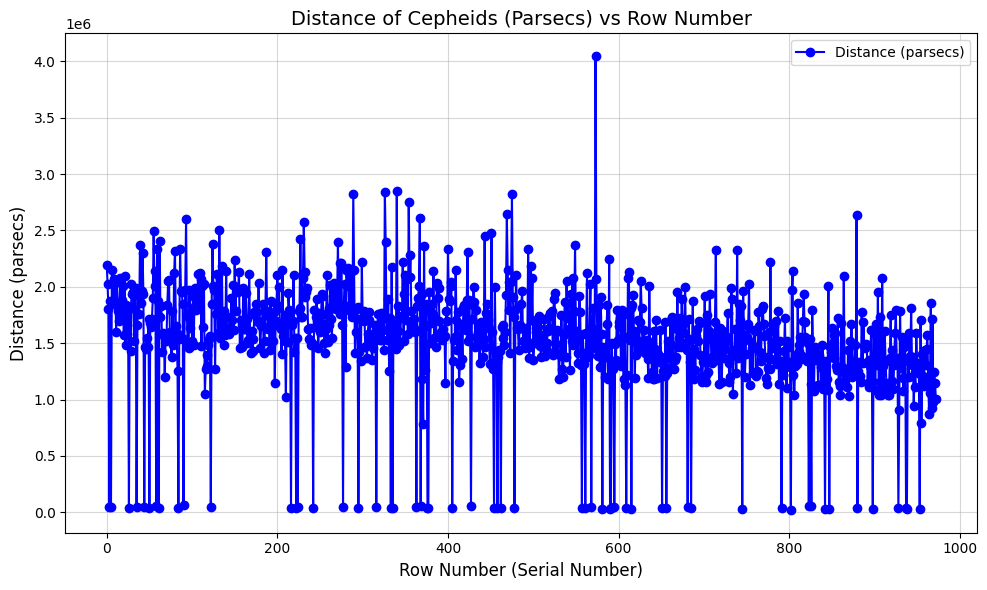

In [12]:

cepheid_distances = pd.read_csv('cepheid_distances.csv')

distances = cepheid_distances['Distance_Parsecs']

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(distances, marker='o', linestyle='-', color='b', label='Distance (parsecs)')

# Label the axes and add a title
plt.xlabel('Row Number (Serial Number)', fontsize=12)
plt.ylabel('Distance (parsecs)', fontsize=12)
plt.title('Distance of Cepheids (Parsecs) vs Row Number', fontsize=14)

plt.legend()
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()




>As the distances are not symmetrically distributed , median provides a better representation of the actual value over the mean. The median is not affected by extreme values making it a robust measure when data has significant spikes.

---





Finally, find the distance to the galaxy being observed.

In [13]:
import pandas as pd

# Load the distances calculated for each Cepheid
cepheid_distances = pd.read_csv('cepheid_distances.csv')

# Calculate the average distance to the galaxy (median)
galaxy_distance = cepheid_distances['Distance_Parsecs'].median()
print(f"The estimated distance to the galaxy is approximately {galaxy_distance:.2f} parsecs.")

with open('galaxy_distance.txt', 'w') as file:
    file.write(f"Estimated Distance to the Galaxy: {galaxy_distance:.2f} parsecs")


The estimated distance to the galaxy is approximately 1576036.77 parsecs.


1parsec≈3.262light-years.



> to look at the deviation i just computed the mean-



In [14]:
cepheid_distances = pd.read_csv('cepheid_distances.csv')

galaxy_distance = cepheid_distances['Distance_Parsecs'].mean()

print(f"The mean distance observed is approximately {galaxy_distance:.2f} parsecs.")

The mean distance observed is approximately 1536991.67 parsecs.


# Part 3

Cepheid variable stars are known for their periodic changes in luminosity due to their pulsations. These stars exhibit a well-defined relationship between their pulsation period and intrinsic luminosity, known as the period-luminosity relation. However, the mechanism driving these pulsations involves complex interactions between radiation pressure, gas pressure, and opacity within the star's interior.

(a) Give a qualitative explanation of the thermal instability that leads to the pulsations in Cepheid variable stars, focusing on the role of the κ-mechanism (opacity mechanism).

The kappa opacity mechanism drives the luminosity variations in many pulsating variable stars.This mechanism operates in layers of the star where partial ionization of certain elements, such as Helium, occurs. The term "kappa" (κ) represents the radiative opacity at different depths in a star's atmosphere.
Opacity refers to how transparent a star's material is to radiation. Highers opacity means that radiation is trapped more effectively, exerting pressure on the surrounding material.
In a typical star, atmospheric compression raises temperature and density, reducing opacity and allowing energy to escape faster, maintaining equilibrium. However, when opacity increases with temperature, the atmosphere becomes unstable, leading to pulsations. As a stellar layer compresses inward, it becomes denser and more opaque, trapping heat. This trapped heat increases pressure, pushing the layer outward.This feedback loop of alternating compression and expansion creates periodic pulsations observed in cepheid variable stars. The process repeats cyclically, causing the star to pulsate.
The κ-mechanism is central to this process because it governs how opacity changes with temperature and density in the ionization zones. The balance between the gravitational force, radiation pressure, and the effects of the κ-mechanism results in a stable, periodic pulsation.
This is why cepheid stars display such well-defined relationships between their periods and luminosities, making them invaluable as standard candles for distance measurement.
